In [1]:
import numpy as np
from numpy.random import default_rng
from typing import Tuple
import matplotlib.pyplot as plt
from MY_RANSAC import ransac,data,line
import scipy

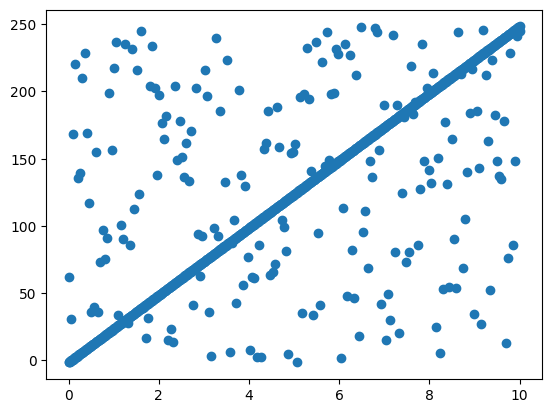

In [7]:
rng = default_rng()
p_gen = data.Point_Generator(1000,0.2)
X,y = p_gen.generate_case(k=25,b=-1.5,eps=0.1)
poly_degree = 1
plt.scatter(X,y)

In [14]:
Line = line.Line(x=X,y=y,degree=poly_degree)
Line.estimate_params()
Line.get_params()
inliers_x, inliers_y, outliers_x, outliers_y = Line.devide_points(X, y, eps = 0.1)
params = Line.get_params() 
params

array([2132.26117111, -294.04636096])

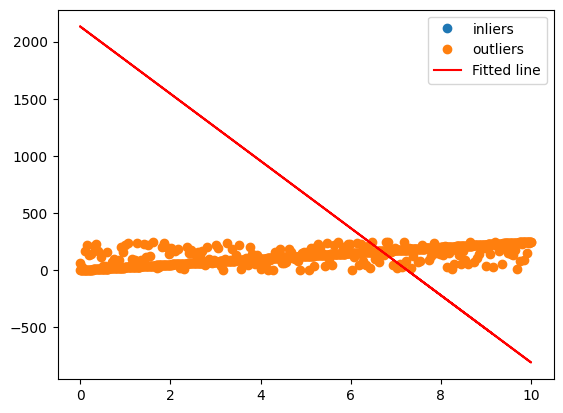

In [15]:
plt.plot(inliers_x, inliers_y, 'o', label='inliers')
plt.plot(outliers_x, outliers_y, 'o', label='outliers')
y_out =  np.fromfunction(lambda i, j: X[i,] ** j, (X.shape[0], poly_degree+1), dtype=int) @ params
plt.plot(X, y_out, 'r', label='Fitted line')
plt.legend()
plt.show()

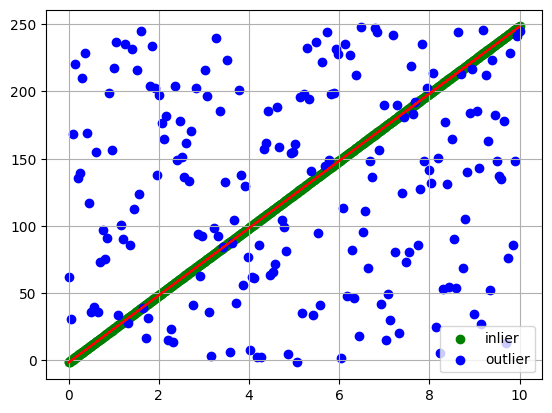

In [16]:
Ransac =  ransac.RANSAC()
case_params = {'x': X, 'y': y,"poly_degree":poly_degree}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()

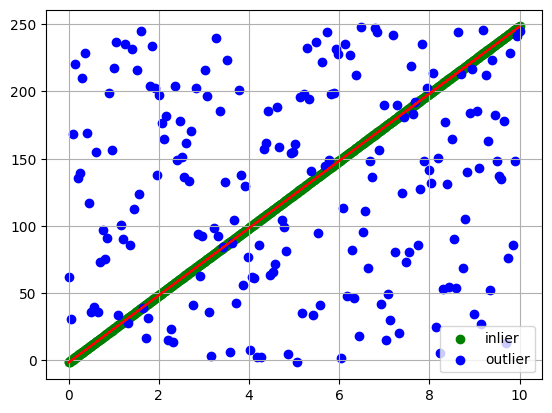

In [17]:
Ransac =  ransac.RANSAC()
case_params ={'x': X, 'y': y,"poly_degree":poly_degree, 'n_pointsy': 5}
Ransac.set_case(case_params)
Ransac.fit()
Ransac.draw()